In [1]:
from imageai.Prediction import ImagePrediction

import os

execution_path = os.getcwd()

prediction = ImagePrediction()

prediction.setModelTypeAsResNet()

prediction.setModelPath( execution_path + "\resnet50_weights_tf_dim_ordering_tf_kernels.h5")

prediction.loadModel()





predictions, percentage_probabilities = prediction.predictImage('l:\\Users\\rohan\\Anaconda3\\pkp.png', result_count=5)

for index in range(len(predictions)):
    print(predictions[index] , " : " , percentage_probabilities[index])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


ValueError: You have specified an incorrect path to the ResNet model file.

In [2]:
from PIL import Image
import numpy as np
i = Image.open('l:\\Users\\rohan\\Anaconda3\\pkp.png')
iar = np.asarray(i)
print(iar)

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


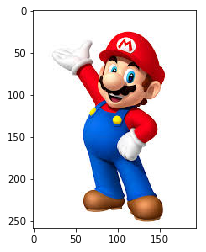

In [4]:
from PIL import Image
import numpy as np
####
import matplotlib.pyplot as plt
###
i = Image.open('l:\\Users\\rohan\\Anaconda3\\pkp.png')

iar = np.asarray(i)


plt.imshow(iar)
#print(iar)
plt.show()

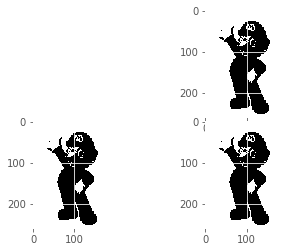

In [6]:
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    from statistics import mean
    for eachRow in imageArray:
        for eachPix in eachRow:
            avgNum = mean(eachPix[:3])
            balanceAr.append(avgNum)

    balance = mean(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if mean(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr

i = Image.open('l:\\Users\\rohan\\Anaconda3\\pkp.png')
iar = np.array(i)
i2 = Image.open('l:\\Users\\rohan\\Anaconda3\\pkp.png')
iar2 = np.array(i2)
i3 = Image.open('l:\\Users\\rohan\\Anaconda3\\pkp.png')
iar3 = np.array(i3)
i4 = Image.open('l:\\Users\\rohan\\Anaconda3\\pkp.png')
iar4 = np.array(i4)


iar = threshold(iar)
iar2 = threshold(iar2)
iar3 = threshold(iar3)
iar4 = threshold(iar4)

fig = plt.figure()
ax1 = plt.subplot2grid((8,6),(0,0), rowspan=10, colspan=10)
ax2 = plt.subplot2grid((8,6),(4,0), rowspan=4, colspan=3)
ax3 = plt.subplot2grid((8,6),(0,3), rowspan=4, colspan=3)
ax4 = plt.subplot2grid((8,6),(4,3), rowspan=10, colspan=10)

ax1.imshow(iar)
ax2.imshow(iar2)
ax3.imshow(iar3)
ax4.imshow(iar4)


plt.show()


In [ ]:
import glob
j=glob.glob("l:\\Users\\rohan\\Anaconda3\\image\\ppk\\*.jpg")
for i in j:
    #print("\n",i)

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import time
from collections import Counter

from matplotlib import style
style.use("ggplot")
numbersWeHave=['rohan1','rohan2','plant1','plant2','car1']
def createExamples():
    numberArrayExamples = open('l:\\Users\\rohan\\Anaconda3\\image\\ppk\\numArExA.txt','a')
    #numbersWeHave = range(0,5)
    for eachNum in numbersWeHave:
        imgFilePath = 'l:\\Users\\rohan\\Anaconda3\\image\\'+str(eachNum)+'.jpeg'
        ei = Image.open(imgFilePath)
        eiar = np.array(ei)
        eiarl = str(eiar.tolist())
        lineToWrite = str(eachNum)+'::'+eiarl+'\n'
        numberArrayExamples.write(lineToWrite)
#createExamples()
def threshold(imageArray):
    balanceAr = []
    newAr = imageArray
    for eachPart in imageArray:
        for theParts in eachPart:
            avgNum = reduce(lambda x, y: x + y, theParts[:3]) / len(theParts[:3])
            balanceAr.append(avgNum)
    balance = reduce(lambda x, y: x + y, balanceAr) / len(balanceAr)
    for eachRow in newAr:
        for eachPix in eachRow:
            if reduce(lambda x, y: x + y, eachPix[:3]) / len(eachPix[:3]) > balance:
                eachPix[0] = 255
                eachPix[1] = 255
                eachPix[2] = 255
                eachPix[3] = 255
            else:
                eachPix[0] = 0
                eachPix[1] = 0
                eachPix[2] = 0
                eachPix[3] = 255
    return newAr


def whatNumIsThis(filePath):
    matchedAr = []
    loadExamps = open('l:\\Users\\rohan\\Anaconda3\\image\\ppk\\numArExA.txt','r').read()
    loadExamps = loadExamps.split('\n')
    i = Image.open(filePath)
    iar = np.array(i)
    iarl = iar.tolist()
    inQuestion = str(iarl)
    for eachExample in loadExamps:
        try:
            splitEx = eachExample.split('::')
            currentNum = splitEx[0]
            currentAr = splitEx[1]
            eachPixEx = currentAr.split('],')
            eachPixInQ = inQuestion.split('],')
            x = 0
            while x < len(eachPixEx):
                if eachPixEx[x] == eachPixInQ[x]:
                    matchedAr.append(int(currentNum))
                x+=1
        except Exception as e:
            k=0
                
    x = Counter(matchedAr)
    print("=",x)
    print("image is : ",max(x, key=x.get),"number")
    '''
    graphX = []
    graphY = []

    ylimi = 0

    for eachThing in x:
        graphX.append(eachThing)
        graphY.append(x[eachThing])
        ylimi = x[eachThing]

    fig = plt.figure()
    ax1 = plt.subplot2grid((4,4),(0,0), rowspan=1, colspan=4)
    ax2 = plt.subplot2grid((4,4),(1,0), rowspan=3,colspan=4)
    ax1.imshow(iar)
    ax2.bar(graphX,graphY,align='center')
    plt.ylim(400)
    xloc = plt.MaxNLocator(12)
    ax2.xaxis.set_major_locator(xloc)
    plt.show()'''

whatNumIsThis('l:\\Users\\rohan\\Anaconda3\\image\\New folder\\0.jpeg')
i = Image.open('l:\\Users\\rohan\\Anaconda3\\image\\New folder\\0.jpeg')
iar = np.asarray(i)
plt.imshow(iar)
#print(iar)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'l:\\Users\\rohan\\Anaconda3\\image\\ppk\\numArExA.txt'

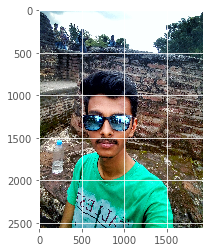

In [3]:
from PIL import Image
import numpy as np
####
import matplotlib.pyplot as plt
###
i = Image.open('l:\\Users\\rohan\\Anaconda3\\image\\New folder\\0.jpeg')
iar = np.asarray(i)
plt.imshow(iar)
#print(iar)
plt.show()